In [1]:
import matplotlib.pyplot as plt
import numpy as np
from celmech import Andoyer, AndoyerHamiltonian
from celmech.andoyer import get_Xstarres, get_Xstarunstable, get_Xstarnonres, get_Xsep
from sympy import init_printing
init_printing()

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

def Phiprime(B):
    return 8.*B/3.

def B(Phiprime):
    return 3.*Phiprime/8.

# First Order Resonances (k=1)

$\Phi'$ is the parameter describing how deep you are in the resonance. It is a combination of the period ratio distance from resonance, e.g. deviation from 1.5 for a 3:2 resonance, and a particular combination of the eccentricities $Z$ (approximately the difference of the eccentricity vectors). Large negative $\Phi'$ means we are very wide of the resonance at low eccentricity (e.g. period ratio of 2.2 for a 3:2 resonance), and large positive $\Phi'$ means we are very deep in the resonance. As we approach the resonance from large negative $\Phi'$, we encounter different bifurcations depending on the order of the resonance (k), where new fixed points can appear or change stability. 

We show below the phase portraits in the qualitatively different regimes between bifurcations. In red are trajectories that oscillate around the resonant fixed point. In blue are trajectories oscillating around a nonresonant fixed point, and in black is the separatrix that divides resonant from nonresonant trajectories. Separatrices do not appear until a bifurcation is encountered that gives rise to an unstable fixed point.

All are polar plots of $Z$ (roughly the magnitude of the difference of the eccentricity vectors) with polar angle given by the resonant angle $\phi$.

0.023672414014346603


Text(0.5, 1.05, "$k=1, \\Phi\\'>1$")

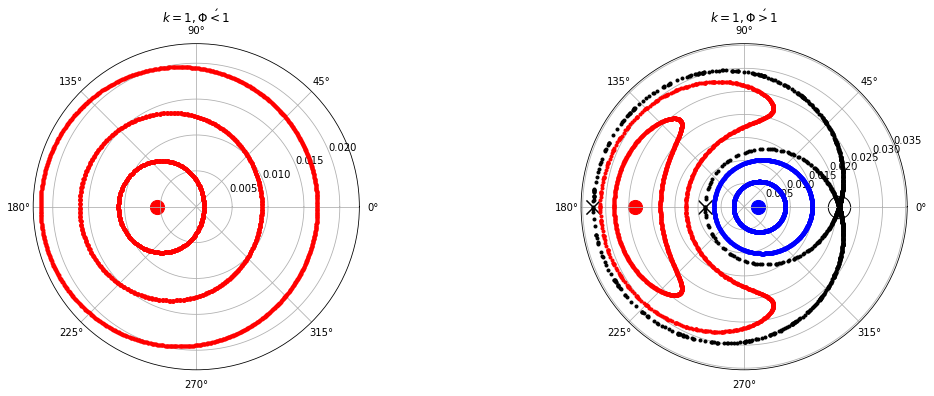

In [31]:
j=3
k=1

fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0,0], projection='polar')

Phiprime = -1.
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
Xstarres = get_Xstarres(k, Phiprime)
Xcircle1 = 2*Xstarres
Xcircle2 = 3*Xstarres
Xcircle3 = 4*Xstarres

Zstarres = andvars.Zstar

Xs = [Xcircle1, Xcircle2, Xcircle3]
colors = ['r', 'r', 'r']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 1000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax1.plot(phi, Z, '.', c=color)
ax1.scatter(np.pi, Zstarres, c='r', marker='o', s=200)

ax2 = fig.add_subplot(gs[0,1], projection='polar')
Phiprime = 2.
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
Xstarres = get_Xstarres(k, Phiprime)
Xstarnonres = get_Xstarnonres(k, Phiprime)
Xstarunstable = get_Xstarunstable(k, Phiprime)
Xsep_inner, Xsep_outer = get_Xsep(k, Phiprime)
Xbanana1 = Xstarres + (Xsep_outer-Xstarres)/2.
Xbanana2 = Xstarres + 5*(Xsep_outer-Xstarres)/6.
Xcircle1 = Xstarnonres + (Xstarunstable-Xstarnonres)/3.
Xcircle2 = Xstarnonres + 2*(Xstarunstable-Xstarnonres)/3.

Zstarres = andvars.Zstar
Zstarunstable = andvars.Zstar_unstable
Zstarnonres = andvars.Zstar_nonres
Zsep_inner = andvars.Zsep_inner
Zsep_outer = andvars.Zsep_outer
print(Zstarres)
Xs = [Xbanana1, Xbanana2, Xcircle1, Xcircle2, Xsep_outer, Xsep_inner]
colors = ['r', 'r', 'b', 'b', 'k', 'k']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 1000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax2.plot(phi, Z, '.', c=color)
    
ax2.scatter(np.pi, Zstarres, c='r', marker='o', s=200)
ax2.scatter(0, Zstarnonres, c='b', marker='o', s=200)
ax2.scatter(0, Zstarunstable, edgecolors='k', facecolor='white', marker='o', s=500, alpha=1.)
ax2.scatter(np.pi, Zsep_inner, c='k', marker='x', s=200)
ax2.scatter(np.pi, Zsep_outer, c='k', marker='x', s=200)

ax1.set_title(r'$k=1, \Phi\'<1$')
ax2.set_title(r'$k=1, \Phi\'>1$')

# Second Order Resonances (k=2)

For second order resonances there are two bifurcations, so three qualitatively different regimes

Text(0.5, 1.05, "$k=2, \\Phi\\'>2/3$")

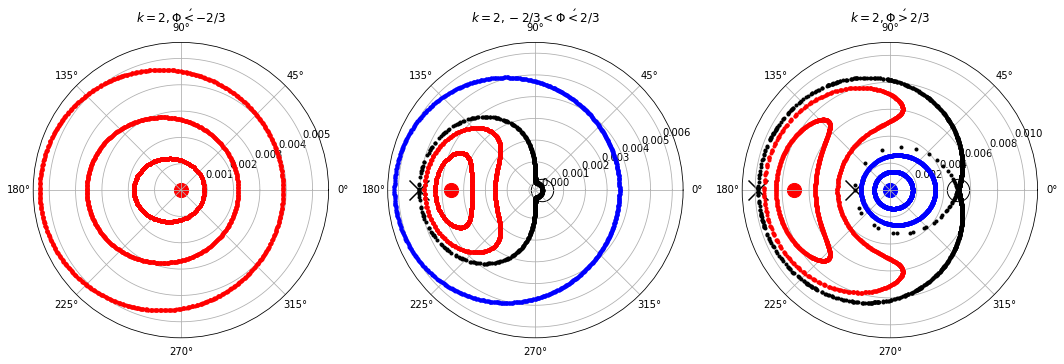

In [68]:
j=5
k=2

fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1, 3)

Phiprime = 0.
ax2 = fig.add_subplot(gs[0,1], projection='polar')
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
Xstarres = get_Xstarres(k, Phiprime)
Xstarunstable = get_Xstarunstable(k, Phiprime)
Xsep_inner, Xsep_outer = get_Xsep(k, Phiprime)
Xbanana1 = Xstarres + (Xsep_outer-Xstarres)/2.
Xbanana2 = Xstarres + 5*(Xsep_outer-Xstarres)/6.
Xouter = -Xstarres

Zstarres = andvars.Zstar
Zstarunstable = andvars.Zstar_unstable
Zsep_inner = andvars.Zsep_inner
Zsep_outer = andvars.Zsep_outer
Xs = [Xbanana1, Xbanana2, Xouter, Xsep_outer]
colors = ['r', 'r', 'b', 'k']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 1000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax2.plot(phi, Z, '.', c=color)
    
ax2.scatter(np.pi, Zstarres, c='r', marker='o', s=200)
ax2.scatter(0, Zstarunstable, edgecolors='k', facecolor='white', marker='o', s=500, alpha=1.)
ax2.scatter(np.pi, Zsep_outer, c='k', marker='x', s=400)

ax1 = fig.add_subplot(gs[0,0], projection='polar')

Phiprime = -1.
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
# use previous case's Xstarres from case with a nonzero fixed point to get a scale, since here the fixed point is at 0
Xcircle1 = Xstarres/2.
Xcircle2 = Xstarres
Xcircle3 = 1.5*Xstarres
Xstarres = get_Xstarres(k, Phiprime)

Zstarres = andvars.Zstar

Xs = [Xcircle1, Xcircle2, Xcircle3]
colors = ['r', 'r', 'r']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 1000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax1.plot(phi, Z, '.', c=color)
ax1.scatter(np.pi, Zstarres, c='r', marker='o', s=200)

Phiprime = 2.
ax3 = fig.add_subplot(gs[0,2], projection='polar')
andvars = Andoyer(j=j, k=k, X=0., Y=0., B=B(Phiprime))
Xstarres = get_Xstarres(k, Phiprime)
Xstarnonres = get_Xstarnonres(k, Phiprime)
Xstarunstable = get_Xstarunstable(k, Phiprime)
Xsep_inner, Xsep_outer = get_Xsep(k, Phiprime)
Xbanana1 = Xstarres + (Xsep_outer-Xstarres)/2.
Xbanana2 = Xstarres + 5*(Xsep_outer-Xstarres)/6.
Xcircle1 = Xstarnonres + (Xstarunstable-Xstarnonres)/3.
Xcircle2 = Xstarnonres + 2*(Xstarunstable-Xstarnonres)/3.

Zstarres = andvars.Zstar
Zstarnonres = andvars.Zstar_nonres
Zstarunstable = andvars.Zstar_unstable
Zsep_inner = andvars.Zsep_inner
Zsep_outer = andvars.Zsep_outer
Xs = [Xbanana1, Xbanana2, Xcircle1, Xcircle2, Xsep_outer, Xsep_inner]
colors = ['r', 'r', 'b', 'b', 'k', 'k']

for X, color in zip(Xs, colors):
    andvars = Andoyer(j=j, k=k, X=X, Y=0., B=B(Phiprime))
    H = AndoyerHamiltonian(andvars)
    tmax=100*andvars.params['tau']
    Nout = 1000
    times = np.linspace(0, tmax, Nout)

    Z, phi = np.zeros(Nout), np.zeros(Nout)
    for i, time in enumerate(times):
        H.integrate(time)
        Z[i] = H.state.Z
        phi[i] = H.state.phi
    ax3.plot(phi, Z, '.', c=color)
    
ax3.scatter(np.pi, Zstarres, c='r', marker='o', s=200)
ax3.scatter(0, Zstarnonres, c='b', marker='o', s=200)
ax3.scatter(0, Zstarunstable, edgecolors='k', facecolor='white', marker='o', s=500, alpha=1.)
ax3.scatter(np.pi, Zsep_outer, c='k', marker='x', s=400)
ax3.scatter(np.pi, Zsep_inner, c='k', marker='x', s=400)


ax1.set_title(r'$k=2, \Phi\'<-2/3$')
ax2.set_title(r'$k=2, -2/3<\Phi\'<2/3$')
ax3.set_title(r'$k=2, \Phi\'>2/3$')